**The Code should take around 6 Minutes to fully run.** Pulling the data and combining it into one usable DataFrame is what takes the majority of this time.

In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
!pip install -U dmba;
from dmba import regressionSummary
from sklearn import preprocessing
from sklearn.decomposition import PCA

     |████████████████████████████████| 11.8 MB 4.6 MB/s 
no display found. Using non-interactive Agg backend


Set parameters for dates to download csv files

In [2]:
dm = date.fromisoformat('2022-04-10')
td = timedelta(1)

stopdate = date(2021,11,15)




Loop to download all neccesary csv files for team statistics. Also cleans csv files: creates column names and only keeps known columns
**Should take around 3.5 Minutes**

In [3]:
while(dm>stopdate):
  url1begin = "https://barttorvik.com/trank.php?year=2022&sort=&hteam=&t2value=&conlimit=All&state=All&begin=20211101&end="

  url1date = (str(dm.year) + str(dm.month).zfill(2) + str(dm.day).zfill(2))

  url3end = "&top=0&revquad=0&quad=5&venue=All&type=All&mingames=0&csv=1#"
  url1 = url1begin + url1date + url3end
  df = pd.read_csv(url1, header = None)

  df.columns = ['Team Name', 'ADJOE', 'ADJDE', 'BARTHAG', 'Record', 'b2', 'Games_Played', 'EFG%', 'EFGD%', 'FTR', 'FTRD', 'TOR', 'TORD',
                'ORB', 'DRB', 'B4', '2P%', '2P%D', '3P%', '3P%D', 'b5','b6','b7','b8','b9','b10', 'ADJ T.','b','b.1','b.2','b.3','b.4',
                'b.5','b.6','b.7','b.8','b.9']
  df[['Wins', 'Losses']] = df['Record'].str.split('–', expand = True)
  df = df.drop(columns = ['b2','B4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b', 'b.1', 'b.2','b.3', 'b.4', 'b.5', 'b.6','b.7','b.8', 'b.9'])
  df.to_csv(url1date + ".csv")
  dm = dm - td


In [4]:
df1 = pd.read_csv('20220302.csv')
df1.columns

Index(['Unnamed: 0', 'Team Name', 'ADJOE', 'ADJDE', 'BARTHAG', 'Record',
       'Games_Played', 'EFG%', 'EFGD%', 'FTR', 'FTRD', 'TOR', 'TORD', 'ORB',
       'DRB', '2P%', '2P%D', '3P%', '3P%D', 'ADJ T.', 'Wins', 'Losses'],
      dtype='object')

Download csv file with data about everygame played in the NCAA. Will be refered to as Scores in our code

In [5]:
scores = pd.read_csv('https://raw.githubusercontent.com/lbenz730/NCAA_Hoops/master/3.0_Files/Results/2021-22/NCAA_Hoops_Results_3_18_2022.csv')
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       11779 non-null  int64  
 1   month      11779 non-null  int64  
 2   day        11779 non-null  int64  
 3   team       11779 non-null  object 
 4   opponent   11779 non-null  object 
 5   location   11779 non-null  object 
 6   teamscore  11268 non-null  float64
 7   oppscore   11268 non-null  float64
 8   canceled   11779 non-null  bool   
 9   postponed  11779 non-null  bool   
 10  OT         0 non-null      float64
 11  D1         11779 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(3)
memory usage: 943.4+ KB


Cleans the Scores data. Match the dates to how we downloaded the csv files earlier. Also only keeps home games, division one games, and games after November 16th. Creates spread column and creates empty columns that will be filled with the team statstics later

In [6]:
scores['year'] = scores['year'].astype(str)
scores['month'] = scores['month'].astype(str).str.zfill(2)
scores['day'] = scores['day'].astype(str).str.zfill(2)
scores['month'] = scores['month']
scores['date'] = scores['year'] + scores['month'] + scores['day']
scores['spread'] =  scores['teamscore'] - scores['oppscore']
scores = scores[scores.location == 'H']
scores = scores[scores.date > '20211116']
scores[['H_ADJOE', 'H_ADJDE', 'H_BARTHAG',
       'H_Games_Played', 'H_EFG%', 'H_EFGD%', 'H_FTR', 'H_FTRD', 'H_TOR', 'H_TORD', 'H_ORB',
       'H_DRB', 'H_2P%', 'H_2P%D', 'H_3P%', 'H_3P%D', 'H_ADJ T.', 'H_Wins', 'H_Losses','A_ADJOE', 'A_ADJDE', 'A_BARTHAG',
       'A_Games_Played', 'A_EFG%', 'A_EFGD%', 'A_FTR', 'A_FTRD', 'A_TOR', 'A_TORD', 'A_ORB',
       'A_DRB', 'A_2P%', 'A_2P%D', 'A_3P%', 'A_3P%D', 'A_ADJ T.', 'A_Wins', 'A_Losses']] = ""
scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4920 entries, 5 to 11778
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            4920 non-null   object 
 1   month           4920 non-null   object 
 2   day             4920 non-null   object 
 3   team            4920 non-null   object 
 4   opponent        4920 non-null   object 
 5   location        4920 non-null   object 
 6   teamscore       4692 non-null   float64
 7   oppscore        4692 non-null   float64
 8   canceled        4920 non-null   bool   
 9   postponed       4920 non-null   bool   
 10  OT              0 non-null      float64
 11  D1              4920 non-null   int64  
 12  date            4920 non-null   object 
 13  spread          4692 non-null   float64
 14  H_ADJOE         4920 non-null   object 
 15  H_ADJDE         4920 non-null   object 
 16  H_BARTHAG       4920 non-null   object 
 17  H_Games_Played  4920 non-null   

Changes team names in the scores dataframe to match how the names in the downloaed csv's

In [7]:
scores = scores.replace('A&M-Corpus Christi', 'Texas A&M Corpus Chris')
scores = scores.replace('Albany (NY)', 'Albany')
scores = scores.replace('Alcorn', 'Alcorn St.')
scores = scores.replace('Ark.-Pine Bluff', 'Arkansas Pine Bluff')
scores = scores.replace('Army West Point', 'Army')
scores = scores.replace('Bethune-Cookman', 'Bethune Cookman')
scores = scores.replace('Boston U.', 'Boston University')
scores = scores.replace('California Baptist', 'Cal Baptist')
scores = scores.replace('Central Ark.', 'Central Arkansas')
scores = scores.replace('Central Conn. St.', 'Central Connecticut')
scores = scores.replace('Central Mich.', 'Central Michigan')
scores = scores.replace('Charleston So.', 'Charleston Southern')
scores = scores.replace('Col. of Charleston', 'College of Charleston')
scores = scores.replace('CSU Bakersfield', 'Cal St. Bakersfield')
scores = scores.replace('CSUN', 'Cal St. Northridge')
scores = scores.replace('Detroit Mercy', 'Detroit')
scores = scores.replace('Eastern Ill.', 'Eastern Illinois')
scores = scores.replace('Eastern Ky.', 'Eastern Kentucky')
scores = scores.replace('Eastern Mich.', 'Eastern Michigan')
scores = scores.replace('Eastern Wash.', 'Eastern Washington')
scores = scores.replace('ETSU', 'East Tennessee St.')
scores = scores.replace('FGCU', 'Florida Gulf Coast')
scores = scores.replace('Fla. Atlantic', 'Florida Atlantic')
scores = scores.replace('Ga. Southern', 'Georgia Southern')
scores = scores.replace('Gardner-Webb', 'Gardner Webb')
scores = scores.replace('Grambling', 'Grambling St.')
scores = scores.replace('Kansas City', 'UMKC')
scores = scores.replace('Lamar University', 'Lamar')
scores = scores.replace('LIU', 'LIU Brooklyn')
scores = scores.replace('LMU (CA)', 'Loyola Marymount')
scores = scores.replace('Louisiana', 'Louisiana Lafayette')
scores = scores.replace('Loyola Maryland', 'Loyola MD')
scores = scores.replace('McNeese', 'McNeese St.')
scores = scores.replace('Miami (FL)', 'Miami FL')
scores = scores.replace('Miami (OH)', 'Miami OH')
scores = scores.replace('Middle Tenn.', 'Middle Tennessee')
scores = scores.replace('Mississippi Val.', 'Mississippi Valley St.')
scores = scores.replace('N.C. A&T', 'North Carolina A&T')
scores = scores.replace('N.C. Central', 'North Carolina Central')
scores = scores.replace('NC State', 'North Carolina St.')
scores = scores.replace('North Ala.', 'North Alabama')
scores = scores.replace('Northern Ariz.', 'Northern Arizona')
scores = scores.replace('Northern Colo.', 'Northern Colorado')
scores = scores.replace('Northern Ill.', 'Northern Illinois')
scores = scores.replace('Northern Ky.', 'Northern Kentucky')
scores = scores.replace('Ole Miss', 'Mississippi')
scores = scores.replace('Omaha', 'Nebraska Omaha')
scores = scores.replace('Prairie View', 'Prairie View A&M')
scores = scores.replace('Purdue Fort Wayne', 'Fort Wayne')
scores = scores.replace('Saint Francis (PA)', 'St. Francis PA')
scores = scores.replace("Saint Mary's (CA)", "Saint Mary's")
scores = scores.replace('Seattle U', 'Seattle')
scores = scores.replace('SFA', 'Stephen F. Austin')
scores = scores.replace('SIUE', 'Southern Illinois')
scores = scores.replace('South Fla.', 'South Florida')
scores = scores.replace('Southeast Mo. St.', 'Southeast Missouri St.')
scores = scores.replace('Southeastern La.', 'Southeastern Louisiana')
scores = scores.replace('Southern California', 'USC')
scores = scores.replace('Southern Ill.', 'Southern Illinois')
scores = scores.replace('Southern Miss.', 'Southern Miss')
scores = scores.replace('Southern U.', 'Southern Utah')
scores = scores.replace('St. Francis Brooklyn', 'St. Francis NY')
scores = scores.replace("St. John's (NY)", "St. John's")
scores = scores.replace('St. Thomas (MN)', 'St. Thomas')
scores = scores.replace('UConn', 'Connecticut')
scores = scores.replace('UIC', 'Illinois Chicago')
scores = scores.replace('UIW', 'Incarnate Word')
scores = scores.replace('ULM', 'Louisiana Monroe')
scores = scores.replace('UMES', 'Maryland Eastern Shore')
scores = scores.replace('UNCW', 'UNC Wilmington')
scores = scores.replace('UNI', 'Northern Iowa')
scores = scores.replace('UT Martin', 'Tennessee Martin')
scores = scores.replace('UTRGV', 'UT Rio Grande Valley')
scores = scores.replace('Western Caro.', 'Western Carolina')
scores = scores.replace('Western Ill.', 'Western Illinois')
scores = scores.replace('Western Ky.', 'Western Kentucky')
scores = scores.replace('Western Mich.', 'Western Michigan')
scores.head()



,year,month,day,team,opponent,location,teamscore,oppscore,canceled,postponed,...,A_TORD,A_ORB,A_DRB,A_2P%,A_2P%D,A_3P%,A_3P%D,A_ADJ T.,A_Wins,A_Losses
5,2021,11,27,Texas A&M Corpus Chris,St. Mary's (TX),H,88.0,73.0,False,False,...,,,,,,,,,,
7,2021,12,04,Texas A&M Corpus Chris,Southwestern (TX),H,111.0,60.0,False,False,...,,,,,,,,,,
8,2021,12,08,Texas A&M Corpus Chris,UT Rio Grande Valley,H,75.0,69.0,False,False,...,,,,,,,,,,
11,2021,12,18,Texas A&M Corpus Chris,Lamar,H,57.0,53.0,False,False,...,,,,,,,,,,
13,2021,12,31,Texas A&M Corpus Chris,Sul Ross St.,H,101.0,49.0,False,False,...,,,,,,,,,,


Loop that matches Scores dataframe to the downloaded csv files, getting the correct data for each team
**Should take around 2 minutes**

In [8]:
scores.dropna(subset = ['date', 'spread'])
scores = scores[scores['D1'] == 2]
for index, row in scores.iterrows():
  d = row['date']
  df = pd.read_csv(d +".csv")
  hteam = row['team']
  ateam = row['opponent']
  hteam_df = df[df['Team Name'] == hteam]
  ateam_df = df[df['Team Name'] == ateam]
  if hteam_df.empty:
    hteam_df.loc[0] = [None, None, None, None, None, None,None, None,None, None,None,None, None,None,None,None, None,None,None,None,None, None]
  if ateam_df.empty:
     ateam_df.loc[0] = [None, None, None, None, None, None,None, None,None, None,None,None, None,None,None,None, None,None,None,None,None, None]
  
  
  scores.at[index, 'H_ADJOE'] = hteam_df.iloc[0]['ADJOE']
  scores.at[index, 'H_ADJDE'] = hteam_df.iloc[0]['ADJDE']
  scores.at[index, 'H_BARTHAG'] = hteam_df.iloc[0]['BARTHAG']
  scores.at[index, 'H_Games_Played'] = hteam_df.iloc[0]['Games_Played']
  scores.at[index, 'H_EFG%'] = hteam_df.iloc[0]['EFG%']
  scores.at[index, 'H_EFGD%'] = hteam_df.iloc[0]['EFGD%']
  scores.at[index, 'H_FTR'] = hteam_df.iloc[0]['FTR']
  scores.at[index, 'H_FTRD'] = hteam_df.iloc[0]['FTRD']
  scores.at[index, 'H_TOR'] = hteam_df.iloc[0]['TOR']
  scores.at[index, 'H_TORD'] = hteam_df.iloc[0]['TORD']
  scores.at[index, 'H_ORB'] = hteam_df.iloc[0]['ORB']
  scores.at[index, 'H_DRB'] = hteam_df.iloc[0]['DRB']
  scores.at[index, 'H_2P%'] = hteam_df.iloc[0]['2P%']
  scores.at[index, 'H_2P%D'] = hteam_df.iloc[0]['2P%D']
  scores.at[index, 'H_3P%'] = hteam_df.iloc[0]['3P%']
  scores.at[index, 'H_3P%D'] = hteam_df.iloc[0]['3P%D']
  scores.at[index, 'H_ADJ T.'] = hteam_df.iloc[0]['ADJ T.']
  scores.at[index, 'H_Wins'] = hteam_df.iloc[0]['Wins']
  scores.at[index, 'H_Losses'] = hteam_df.iloc[0]['Losses']
  
  scores.at[index, 'A_ADJOE'] = ateam_df.iloc[0]['ADJOE']
  scores.at[index, 'A_ADJDE'] = ateam_df.iloc[0]['ADJDE']
  scores.at[index, 'A_BARTHAG'] = ateam_df.iloc[0]['BARTHAG']
  scores.at[index, 'A_Games_Played'] = ateam_df.iloc[0]['Games_Played']
  scores.at[index, 'A_EFG%'] = ateam_df.iloc[0]['EFG%']
  scores.at[index, 'A_EFGD%'] = ateam_df.iloc[0]['EFGD%']
  scores.at[index, 'A_FTR'] = ateam_df.iloc[0]['FTR']
  scores.at[index, 'A_FTRD'] = ateam_df.iloc[0]['FTRD']
  scores.at[index, 'A_TOR'] = ateam_df.iloc[0]['TOR']
  scores.at[index, 'A_TORD'] = ateam_df.iloc[0]['TORD']
  scores.at[index, 'A_ORB'] = ateam_df.iloc[0]['ORB']
  scores.at[index, 'A_DRB'] = ateam_df.iloc[0]['DRB']
  scores.at[index, 'A_2P%'] = ateam_df.iloc[0]['2P%']
  scores.at[index, 'A_2P%D'] = ateam_df.iloc[0]['2P%D']
  scores.at[index, 'A_3P%'] = ateam_df.iloc[0]['3P%']
  scores.at[index, 'A_3P%D'] = ateam_df.iloc[0]['3P%D']
  scores.at[index, 'A_ADJ T.'] = ateam_df.iloc[0]['ADJ T.']
  scores.at[index, 'A_Wins'] = ateam_df.iloc[0]['Wins']
  scores.at[index, 'A_Losses'] = ateam_df.iloc[0]['Losses']
  
  
  
 

In [9]:
scores

,year,month,day,team,opponent,location,teamscore,oppscore,canceled,postponed,...,A_TORD,A_ORB,A_DRB,A_2P%,A_2P%D,A_3P%,A_3P%D,A_ADJ T.,A_Wins,A_Losses
8,2021,12,08,Texas A&M Corpus Chris,UT Rio Grande Valley,H,75.0,69.0,False,False,...,17.8,23.6,32.7,50.5,58.6,34.0,32.7,74.4,2,6
11,2021,12,18,Texas A&M Corpus Chris,Lamar,H,57.0,53.0,False,False,...,17.6,30.2,34.0,44.3,51.8,31.6,37.8,66.2,0,10
17,2022,01,15,Texas A&M Corpus Chris,Incarnate Word,H,80.0,64.0,False,False,...,17.4,20.0,33.1,46.2,56.6,32.3,38.1,67.6,2,13
18,2022,01,20,Texas A&M Corpus Chris,McNeese St.,H,60.0,56.0,False,False,...,19.7,31.0,31.0,46.9,50.4,29.8,34.4,71.2,3,12
19,2022,01,22,Texas A&M Corpus Chris,Houston Baptist,H,71.0,77.0,False,False,...,19.0,29.8,27.7,51.1,53.1,26.6,40.6,67.9,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11771,2022,02,11,Youngstown St.,Detroit,H,82.0,69.0,False,False,...,19.4,28.5,29.0,49.4,54.2,36.2,36.3,66.5,9,12
11772,2022,02,13,Youngstown St.,Robert Morris,H,68.0,73.0,False,False,...,16.7,27.6,30.7,50.5,51.4,33.6,36.7,68.4,6,19
11773,2022,02,17,Youngstown St.,Illinois Chicago,H,88.0,79.0,False,False,...,17.3,25.1,28.1,53.1,50.8,31.6,37.3,69.4,9,15
11774,2022,02,19,Youngstown St.,IUPUI,H,74.0,61.0,False,False,...,20.4,30.1,33.7,42.0,51.0,28.9,35.9,63.4,1,23


In [10]:
scores.to_csv('scores.csv')


Some charts that help show trends in the data:
1. Scatterplot of hometeam score and home team offensive efficiency, with a hue of away team defensive efficiency
2. Reverse of 1st scatterplot, away team score and offensive efficiency, with a hue of the home team deensive efficiency
3. Scatter of home team offensive efficiency and away team defensive efficiency with a hue of the spread
4. Scatter of both teams BARTHAG and the spread


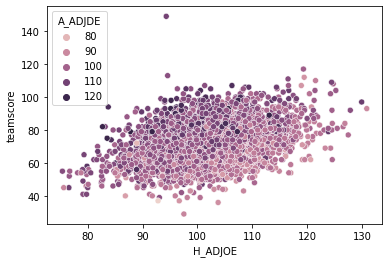

In [11]:
sns.scatterplot(data = scores, x = 'H_ADJOE', y ='teamscore', hue = 'A_ADJDE')

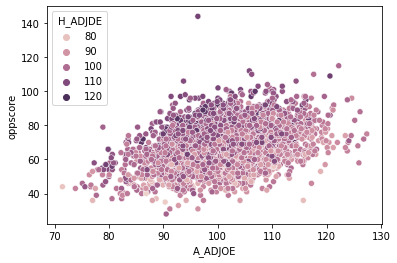

In [12]:

sns.scatterplot(data = scores, x = 'A_ADJOE', y ='oppscore', hue = 'H_ADJDE')

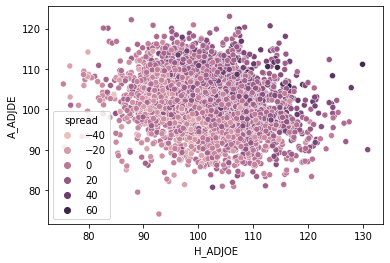

In [13]:
sns.scatterplot(data = scores, x = 'H_ADJOE', y ='A_ADJDE', hue = 'spread')

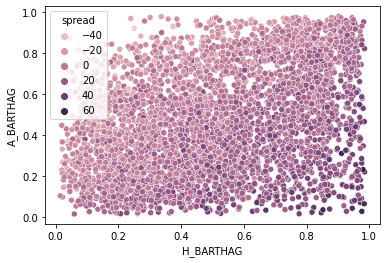

In [14]:
sns.scatterplot(data = scores, x = 'H_BARTHAG', y ='A_BARTHAG', hue = 'spread')

Correlation Matrix of all variables

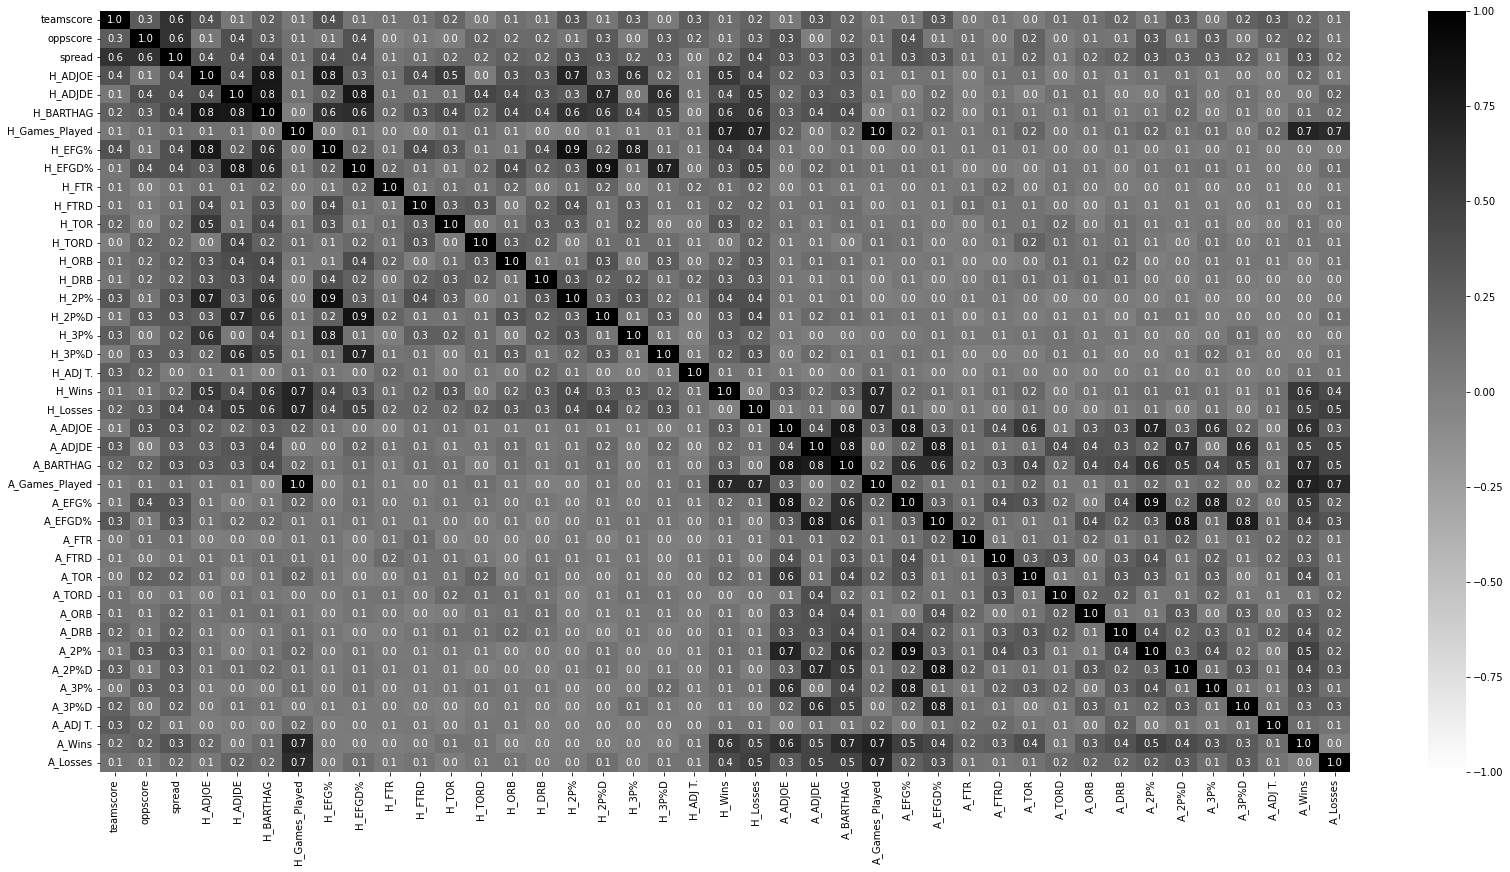

In [15]:
colls = {'year', 'month', 'day', 'team', 'opponent', 'location', 'canceled', 'postponed', 'OT', 'D1', 'date'}
num_scores = scores.drop(colls, axis = 1)
num_scores = num_scores.astype(np.float64)
corr_scores = num_scores.corr()
plt.figure(figsize = (28,14))
sns.heatmap(np.absolute(corr_scores), annot = True,vmin = -1, vmax = 1, fmt = ".1f", cmap = 'gray_r')

PCA. Use first 8 components for model

In [16]:
selected_vars = ['spread','H_ADJOE', 'H_ADJDE', 'H_BARTHAG', 'H_EFG%', 'H_EFGD%', 'H_FTR', 'H_FTRD', 'H_TOR', 'H_TORD', 'H_ORB', 'H_DRB', 'H_2P%', 'H_2P%D', 'H_ADJ T.','A_ADJOE', 'A_ADJDE', 'A_BARTHAG', 'A_EFG%', 'A_EFGD%', 'A_FTR', 'A_FTRD', 'A_TOR', 'A_TORD', 'A_ORB', 'A_DRB', 'A_2P%', 'A_2P%D', 'A_ADJ T.']
score_pca = scores.dropna(subset = ['spread'])
score_pca = score_pca[selected_vars]
scores_pca_spread = score_pca['spread']
score_pca = score_pca.drop('spread', 1)
selected_vars = ['H_ADJOE', 'H_ADJDE', 'H_BARTHAG', 'H_EFG%', 'H_EFGD%', 'H_FTR', 'H_FTRD', 'H_TOR', 'H_TORD', 'H_ORB', 'H_DRB', 'H_2P%', 'H_2P%D', 'H_ADJ T.','A_ADJOE', 'A_ADJDE', 'A_BARTHAG', 'A_EFG%', 'A_EFGD%', 'A_FTR', 'A_FTRD', 'A_TOR', 'A_TORD', 'A_ORB', 'A_DRB', 'A_2P%', 'A_2P%D', 'A_ADJ T.']
scaled_arr = preprocessing.scale(score_pca)
scaled_df = pd.DataFrame(scaled_arr)
pcs = PCA(n_components = 8)
principalComponents = pcs.fit_transform(scaled_df)
principalDF = pd.DataFrame(
    principalComponents.round(3),
    columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8']
)
score_pca.reset_index(drop=True, inplace=True)
principalDF.reset_index(drop=True, inplace=True)
scores_aug = pd.concat([score_pca, principalDF], axis = 1)

scores_aug['spread'] = scores_pca_spread.to_numpy()

scores_aug


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,H_ADJOE,H_ADJDE,H_BARTHAG,H_EFG%,H_EFGD%,H_FTR,H_FTRD,H_TOR,H_TORD,H_ORB,...,A_ADJ T.,F1,F2,F3,F4,F5,F6,F7,F8,spread
0,96.072848,101.192936,0.355006,45.3,50.2,43.0,40.9,21.0,25.4,37.0,...,74.4,-2.778,0.750,1.850,-2.816,4.231,-0.948,-0.019,1.512,6.0
1,94.140883,100.605581,0.317827,45.8,52.0,40.1,41.6,18.9,28.7,31.7,...,66.2,-3.937,1.460,1.982,-1.116,1.511,2.285,1.710,-0.073,4.0
2,97.756523,101.764876,0.386481,48.4,51.4,40.2,42.2,19.7,26.6,32.7,...,67.6,-3.743,2.182,0.284,-2.537,1.615,1.913,1.382,0.474,16.0
3,96.519296,100.803441,0.377672,48.1,50.4,39.2,39.7,20.0,26.4,33.0,...,71.2,-2.248,1.344,3.329,-0.337,1.956,0.065,1.168,0.746,4.0
4,95.673985,101.434707,0.337961,47.8,50.7,39.8,40.4,20.0,26.1,32.5,...,67.9,-3.010,1.303,1.886,-1.394,1.828,0.897,1.550,1.007,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,102.939055,106.619614,0.400352,51.1,49.9,29.8,29.7,17.2,16.9,29.5,...,66.5,-0.735,0.361,-1.966,-0.431,0.080,0.590,-0.779,-0.877,13.0
4344,102.846598,107.10935,0.385318,51.1,50.2,28.9,29.8,17.2,17.1,30.0,...,68.4,-1.208,0.599,-1.618,-0.172,0.009,-0.504,0.383,-0.120,-5.0
4345,103.288004,107.759158,0.38052,51.2,50.4,29.3,29.3,16.8,17.0,29.9,...,69.4,-0.860,0.131,-2.143,-0.284,-0.061,0.038,-0.681,-0.346,9.0
4346,103.505447,108.45357,0.36888,51.6,50.3,29.9,29.5,16.9,17.2,30.0,...,63.4,-3.255,3.193,0.350,2.719,-1.066,0.128,0.580,-0.501,13.0


In [17]:
 
cols = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'spread']
 scoresN = scores_aug[cols]
 scoresN = scoresN.dropna(subset = ['spread'])

Scale Variables for Neural Network

In [18]:
y_nonscaled = scoresN['spread'].astype(float)
y_nonscaled = pd.DataFrame(y_nonscaled)
x_nonscaled = scoresN.drop(columns=['spread']).astype(float)


In [19]:
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

x = scaleInput.fit_transform(x_nonscaled)
y = scaleOutput.fit_transform(y_nonscaled)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)

                                                  

Run Neural Network Model. Two Layers of 5 Nodes, Logisitic, alpha of 0.25

In [20]:
score_nnet = MLPRegressor(hidden_layer_sizes=(5,5), activation='logistic', solver='lbfgs', random_state=1, alpha = 0.25)
score_nnet.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=0.25, hidden_layer_sizes=(5, 5),
             random_state=1, solver='lbfgs')

In [21]:
y_pred = score_nnet.predict(x_test)

In [22]:
y_actual = scaleOutput.inverse_transform(y_test).ravel()
y_pred = scaleOutput.inverse_transform([score_nnet.predict(x_test)]).ravel()

Summary Stats of model on test data

In [23]:
regressionSummary(y_pred, y_actual)


Regression statistics

                      Mean Error (ME) : 0.0962
       Root Mean Squared Error (RMSE) : 10.2102
            Mean Absolute Error (MAE) : 7.9398
          Mean Percentage Error (MPE) : -23.6832
Mean Absolute Percentage Error (MAPE) : 591.5023


In [24]:
output = pd.concat([pd.DataFrame(y_pred,columns = ['pred']),pd.DataFrame(y_actual,columns = ['actual'])], axis = 1)
output.to_csv('output.csv')
output['diff'] = abs(output['pred'] - output['actual'])


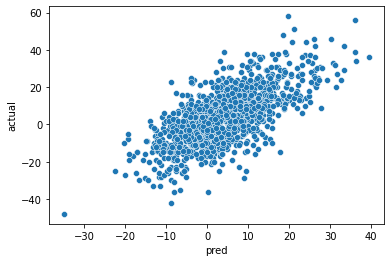

In [25]:
sns.scatterplot(data = output, x = 'pred', y = 'actual')

In [26]:

y_tot_act = scaleOutput.inverse_transform(y).ravel()
y_tot_pred = scaleOutput.inverse_transform([score_nnet.predict(x)]).ravel()

In [27]:
tot_out = pd.concat([pd.DataFrame(y_tot_pred,columns = ['pred']),pd.DataFrame(y_tot_act,columns = ['actual'])], axis = 1)


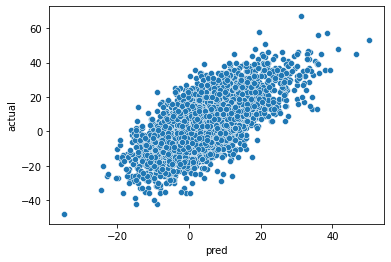

In [28]:
sns.scatterplot(data = tot_out, x = 'pred', y = 'actual')


Put the predicted spreads back onto a dataframe with all of the original statistics. Also create columns to check the difference between predicted and actual spread and created a column that outputs if the predicted spread predicted the correct winner

In [29]:

scores_out = scores.dropna(subset = ['spread'])
scores_out.reset_index(drop=True,inplace=True)
scores_out['pred'] = pd.Series(tot_out['pred'])
scores_out['diff'] = abs(scores_out['pred'] - scores_out['spread'])
scores_out.to_csv('output.csv')
scores_out['is_correct'] = np.where(((scores_out['spread'] > 0) & (scores_out['pred'] > 0)) | ((scores_out['spread'] < 0) & (scores_out['pred'] < 0)), 1, 0)

scores_out

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,year,month,day,team,opponent,location,teamscore,oppscore,canceled,postponed,...,A_2P%,A_2P%D,A_3P%,A_3P%D,A_ADJ T.,A_Wins,A_Losses,pred,diff,is_correct
0,2021,12,08,Texas A&M Corpus Chris,UT Rio Grande Valley,H,75.0,69.0,False,False,...,50.5,58.6,34.0,32.7,74.4,2,6,8.650630,2.650630,1
1,2021,12,18,Texas A&M Corpus Chris,Lamar,H,57.0,53.0,False,False,...,44.3,51.8,31.6,37.8,66.2,0,10,11.239437,7.239437,1
2,2022,01,15,Texas A&M Corpus Chris,Incarnate Word,H,80.0,64.0,False,False,...,46.2,56.6,32.3,38.1,67.6,2,13,16.320014,0.320014,1
3,2022,01,20,Texas A&M Corpus Chris,McNeese St.,H,60.0,56.0,False,False,...,46.9,50.4,29.8,34.4,71.2,3,12,9.625380,5.625380,1
4,2022,01,22,Texas A&M Corpus Chris,Houston Baptist,H,71.0,77.0,False,False,...,51.1,53.1,26.6,40.6,67.9,2,10,11.400325,17.400325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,2022,02,11,Youngstown St.,Detroit,H,82.0,69.0,False,False,...,49.4,54.2,36.2,36.3,66.5,9,12,6.054891,6.945109,1
4344,2022,02,13,Youngstown St.,Robert Morris,H,68.0,73.0,False,False,...,50.5,51.4,33.6,36.7,68.4,6,19,8.884362,13.884362,0
4345,2022,02,17,Youngstown St.,Illinois Chicago,H,88.0,79.0,False,False,...,53.1,50.8,31.6,37.3,69.4,9,15,5.457812,3.542188,1
4346,2022,02,19,Youngstown St.,IUPUI,H,74.0,61.0,False,False,...,42.0,51.0,28.9,35.9,63.4,1,23,16.168221,3.168221,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


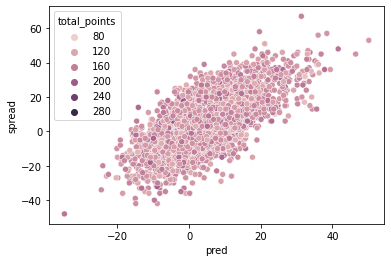

In [30]:
scores_out['total_points'] = scores_out['teamscore'] + scores_out['oppscore']
sns.scatterplot(data = scores_out, x = 'pred', y = 'spread', hue = 'total_points')

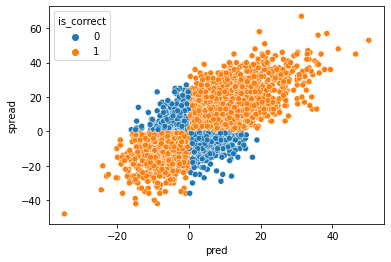

In [31]:
sns.scatterplot(data = scores_out, x = 'pred', y = 'spread', hue='is_correct')

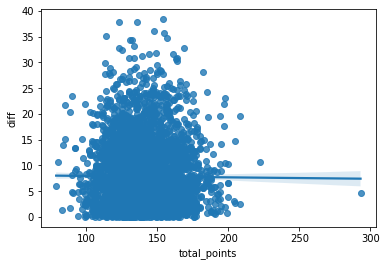

In [32]:
sns.regplot(data = scores_out, x = 'total_points', y = 'diff')


Text(0, 0.5, '# of occurences')

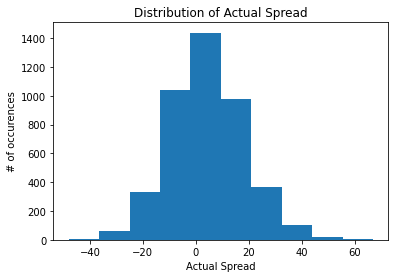

In [33]:
spread_hist = plt.hist(scores_out['spread'])
plt.title('Distribution of Actual Spread')
plt.xlabel('Actual Spread')
plt.ylabel('# of occurences')

Text(0, 0.5, '# of occurences')

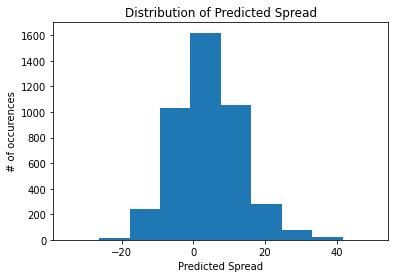

In [34]:
predSpred_hist = plt.hist(scores_out['pred'])
plt.title('Distribution of Predicted Spread')
plt.xlabel('Predicted Spread')
plt.ylabel('# of occurences')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


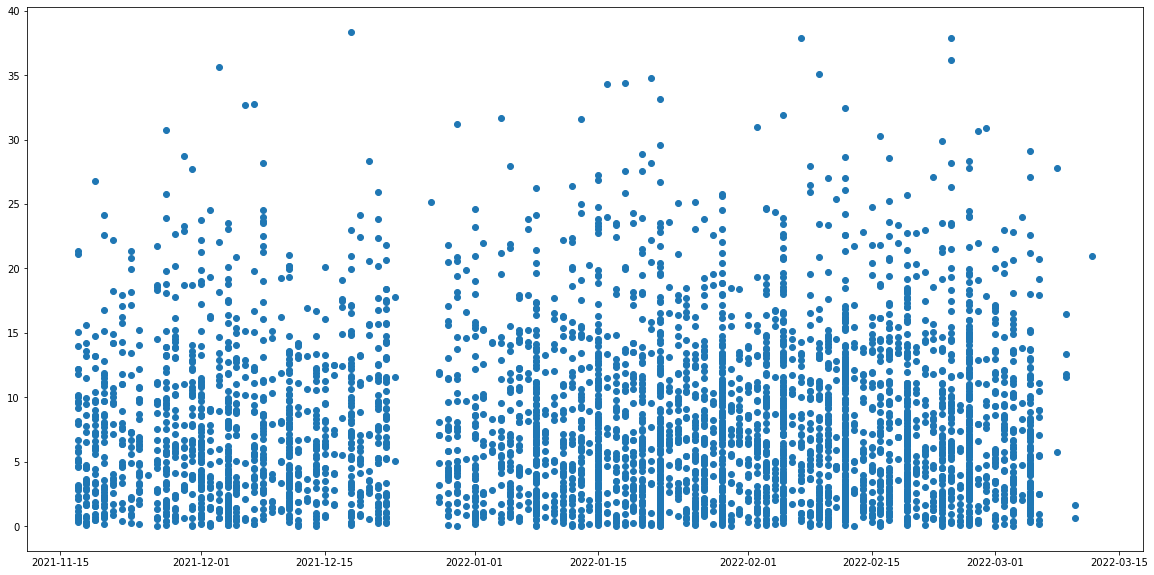

In [35]:
scores_out['date'] = pd.to_datetime(scores_out[['year','month','day']])
plt.figure(figsize = (20,10))
plt.plot_date(scores_out['date'],scores_out['diff'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, '2021-11-06'),
 Text(0, 0, '2021-11-26'),
 Text(0, 0, '2021-12-16'),
 Text(0, 0, '2022-01-05'),
 Text(0, 0, '2022-01-25'),
 Text(0, 0, '2022-02-14'),
 Text(0, 0, '2022-03-06'),
 Text(0, 0, '2022-03-26')]

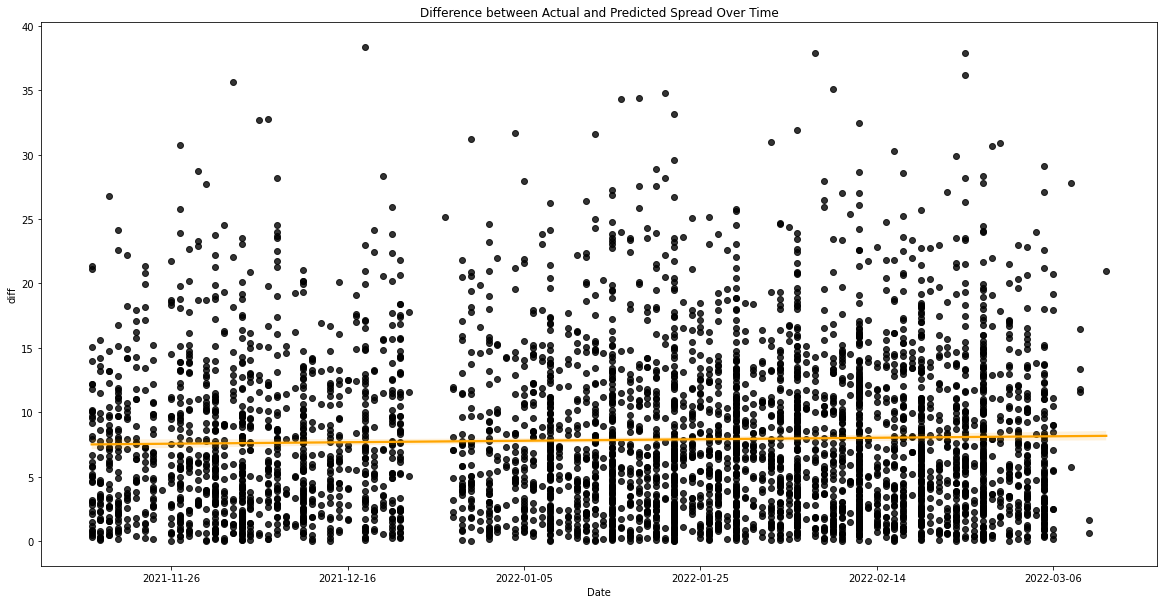

In [36]:
plt.figure(figsize = (20,10))
scores_out['date_ordinal'] = pd.to_datetime(scores_out['date']).apply( lambda date: date.toordinal())
ax = sns.regplot(data = scores_out, x = 'date_ordinal', y = 'diff', scatter_kws= {'color': 'black'}, line_kws={'color': 'orange'})
ax.set_xlabel('Date')
ax.set_title('Difference between Actual and Predicted Spread Over Time')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

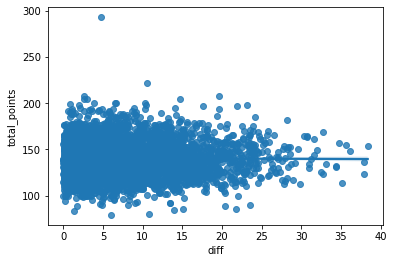

In [37]:
sns.regplot(data = scores_out, x = 'diff', y = 'total_points')

Summary Stats of Spread, Predicted Spread, Difference, and is_correct

In [38]:
scores_out['spread'].describe()

count    4348.000000
mean        4.173873
std        13.914942
min       -48.000000
25%        -5.000000
50%         4.000000
75%        13.000000
max        67.000000
Name: spread, dtype: float64

In [39]:
scores_out['pred'].describe()

count    4348.000000
mean        4.208804
std         9.160005
min       -34.808706
25%        -1.941425
50%         3.807041
75%         9.823177
max        50.175979
Name: pred, dtype: float64

In [40]:
scores_out['diff'].describe()

count    4348.000000
mean        7.862345
std         6.213788
min         0.003165
25%         2.955624
50%         6.505621
75%        11.209897
max        38.355708
Name: diff, dtype: float64

In [41]:
scores_out['is_correct'].describe()

count    4348.000000
mean        0.761040
std         0.426498
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_correct, dtype: float64

In [42]:
scores_out['diff'].median()

6.505620964010843

Import the Las Vegas Spreads and merge them onto a dataframe with the models output

In [82]:
vegas = pd.read_csv('ncaabb21.csv')
vegas.date = pd.to_datetime(vegas.date)
vegas_use = vegas[['date', 'home', 'line']]


scores_with_vegas = scores_out.merge(vegas_use, left_on = ['date', 'team'], right_on= ['date', 'home'] )
scores_with_vegas.to_csv('withvegas.csv')
scores_with_vegas

,year,month,day,team,opponent,location,teamscore,oppscore,canceled,postponed,...,A_ADJ T.,A_Wins,A_Losses,pred,diff,is_correct,total_points,date_ordinal,home,line
0,2021,12,04,Abilene Christian,Incarnate Word,H,98.0,65.0,False,False,...,67.9,0,7,23.162438,9.837562,1,163.0,738128,Abilene Christian,17.5
1,2021,12,11,Abilene Christian,Drexel,H,73.0,56.0,False,False,...,68.2,3,5,7.975196,9.024804,1,129.0,738135,Abilene Christian,5.0
2,2021,12,15,Abilene Christian,Cal St. Bakersfield,H,69.0,59.0,False,False,...,68.5,2,3,12.452880,2.452880,1,128.0,738139,Abilene Christian,8.5
3,2022,01,06,Abilene Christian,Stephen F. Austin,H,58.0,64.0,False,False,...,70.1,5,4,8.522118,14.522118,0,122.0,738161,Abilene Christian,6.5
4,2022,01,08,Abilene Christian,Sam Houston St.,H,63.0,65.0,False,False,...,67.8,5,9,11.820408,13.820408,0,128.0,738163,Abilene Christian,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,2022,02,11,Youngstown St.,Detroit,H,82.0,69.0,False,False,...,66.5,9,12,6.054891,6.945109,1,151.0,738197,Youngstown St.,1.5
3537,2022,02,13,Youngstown St.,Robert Morris,H,68.0,73.0,False,False,...,68.4,6,19,8.884362,13.884362,0,141.0,738199,Youngstown St.,7.0
3538,2022,02,17,Youngstown St.,Illinois Chicago,H,88.0,79.0,False,False,...,69.4,9,15,5.457812,3.542188,1,167.0,738203,Youngstown St.,6.0
3539,2022,02,19,Youngstown St.,IUPUI,H,74.0,61.0,False,False,...,63.4,1,23,16.168221,3.168221,1,135.0,738205,Youngstown St.,17.5


Create columns to check the difference between Las Vegas spread and actual spread, check if our model is closer, and finally assign a predicted profit/loss to each game. -1 if Vegas is closer and +0.91$ if our model is closer

In [44]:
scores_with_vegas['vegas_diff'] = abs(scores_with_vegas['spread'] - scores_with_vegas['line'])
scores_with_vegas['isModelCloser'] = np.where(scores_with_vegas['vegas_diff'] > scores_with_vegas['diff'], 1, 0)
scores_with_vegas['bettingOutcome'] = np.where(scores_with_vegas['vegas_diff'] > scores_with_vegas['diff'], 0.91, -1)
scores_with_vegas['is_vegas_correct'] = np.where(((scores_with_vegas['spread'] > 0) & (scores_with_vegas['line'] > 0)) | ((scores_with_vegas['spread'] < 0) & (scores_with_vegas['line'] < 0)), 1, 0)

Summary Stats of Vegas Variables: vegas_diff, is_vegas_correct, and isModelCloser

In [45]:
scores_with_vegas['vegas_diff'].describe()

count    3540.000000
mean        8.465678
std         6.705088
min         0.000000
25%         3.500000
50%         7.000000
75%        12.000000
max        44.000000
Name: vegas_diff, dtype: float64

In [46]:
scores_with_vegas['vegas_diff'].median()

7.0

In [47]:
scores_with_vegas['is_vegas_correct'].describe()

count    3541.000000
mean        0.724372
std         0.446893
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_vegas_correct, dtype: float64

In [48]:
scores_with_vegas['isModelCloser'].describe()

count    3541.000000
mean        0.566789
std         0.495589
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: isModelCloser, dtype: float64

In [49]:
scores_with_vegas['bettingOutcome'].describe()

count    3541.000000
mean        0.082567
std         0.946575
min        -1.000000
25%        -1.000000
50%         0.910000
75%         0.910000
max         0.910000
Name: bettingOutcome, dtype: float64

In [50]:
scores_with_vegas['bettingOutcome'].sum()

292.3700000000001

In [51]:
scores_with_vegas['betting_overtime'] = ""
scores_with_vegas['betting_overtime'][0] = scores_with_vegas['bettingOutcome'][0]
for row in range(1,len(scores_with_vegas)):
  scores_with_vegas['betting_overtime'][row] = (scores_with_vegas['betting_overtime'][row-1]+scores_with_vegas['bettingOutcome'][row])

scores_with_vegas['betting_overtime']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         0.91
1         1.82
2         0.82
3        -0.18
4        -1.18
         ...  
3536    292.55
3537    291.55
3538    290.55
3539    291.46
3540    292.37
Name: betting_overtime, Length: 3541, dtype: object

Text(0.5, 0, 'Number of Games Played')

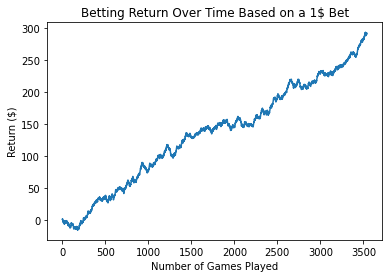

In [55]:
ax = plt.plot(scores_with_vegas.index, scores_with_vegas['betting_overtime'])
plt.title('Betting Return Over Time Based on a 1$ Bet')
plt.ylabel('Return ($)')
plt.xlabel('Number of Games Played')


Text(0.5, 1.0, 'Difference in Spread from Model to Reality')

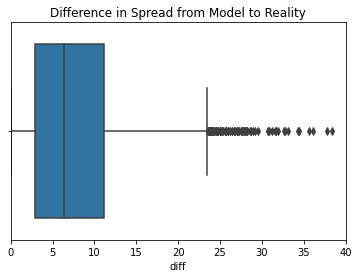

In [53]:
sns.boxplot(x = scores_with_vegas['diff'], )
plt.xlim(0,40)
plt.title('Difference in Spread from Model to Reality')


Text(0.5, 1.0, 'Difference in Spread from Vegas to Reality')

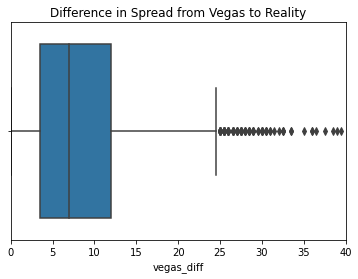

In [54]:
sns.boxplot(x = scores_with_vegas['vegas_diff'])
plt.xlim(0,40)
plt.title('Difference in Spread from Vegas to Reality')